<a href="https://colab.research.google.com/github/qurainisepty/portfolio/blob/main/employee_promotion_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:
import seaborn as sn
import matplotlib as mpl
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [ ]:
df = pd.read_csv('data_train_dqlab.csv')
df.head(5)

,employee_id,department,region,education,gender,job_level,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,satisfaction_score,engagement_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,senior,sourcing,1.0,35.0,5.0,8.0,0.0,49.0,5.0,0.88,0.0
1,65141,Operations,region_22,Bachelor's,m,middle,other,1.0,30.0,5.0,4.0,0.0,60.0,1.0,0.31,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,middle,sourcing,1.0,34.0,3.0,7.0,0.0,50.0,5.0,3.10,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,senior,other,2.0,39.0,1.0,10.0,0.0,50.0,4.0,0.64,0.0
4,48945,Technology,region_26,Bachelor's,m,senior,other,1.0,45.0,3.0,2.0,0.0,73.0,2.0,0.95,0.0


### **EDA**

In [ ]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,satisfaction_score,engagement_score,is_promoted
count,26074.000000,26073.000000,26073.000000,24091.000000,26073.000000,26073.000000,26073.000000,26073.000000,26073.000000,26073.000000
mean,39095.234448,1.250221,34.805623,3.334897,5.873662,0.022782,63.410041,3.000575,1.506732,0.006559
std,22561.056985,0.601903,7.663636,1.260902,4.290081,0.149211,13.385774,1.413549,1.189735,0.080720
min,2.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,1.000000,0.000000,0.000000
25%,19509.250000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,2.000000,0.550000,0.000000
50%,39131.000000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,3.000000,1.180000,0.000000
75%,58504.750000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,4.000000,2.230000,0.000000
max,78297.000000,10.000000,60.000000,5.000000,34.000000,1.000000,99.000000,5.000000,5.000000,1.000000


In [ ]:
df['is_promoted'].value_counts()

0.0    25902
1.0      171
Name: is_promoted, dtype: int64

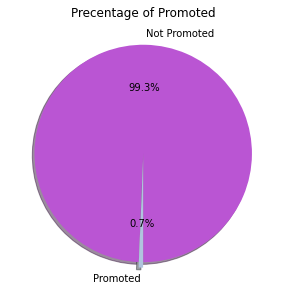

In [ ]:
sizes = df['is_promoted'].value_counts(sort = True)
colors = ["purple", "yellow"]
mpl.rcParams['figure.figsize'] = 5,5
labels = "Not Promoted", "Promoted"
explode = (0.05, 0)
plt.pie(sizes, explode = explode, labels = labels, colors = ['#ba55d3', '#b0c4de'],
                        autopct = '%1.1f%%', shadow = True, startangle = 270)
plt.title("Precentage of Promoted")
plt.show()

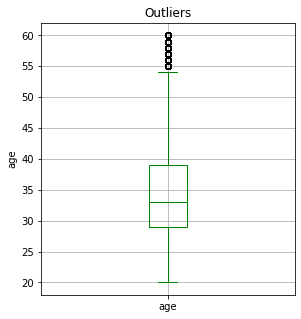

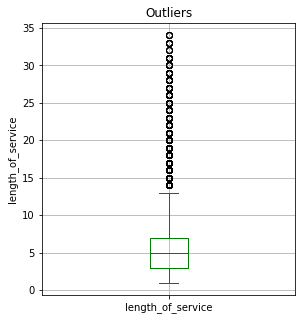

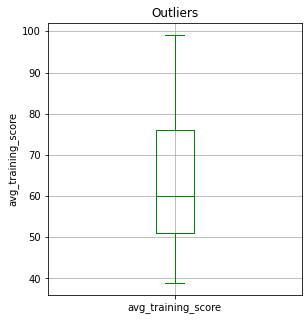

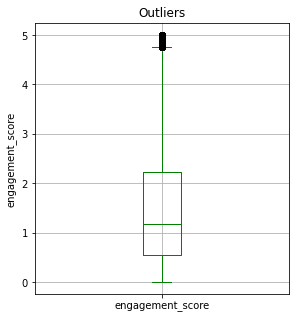

In [ ]:
integer = ['age', 'length_of_service', 'avg_training_score','engagement_score']
for var in integer:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    fig = df.boxplot(column=var, color = 'green')
    fig.set_title('Outliers')
    fig.set_ylabel(var)
    plt.show()

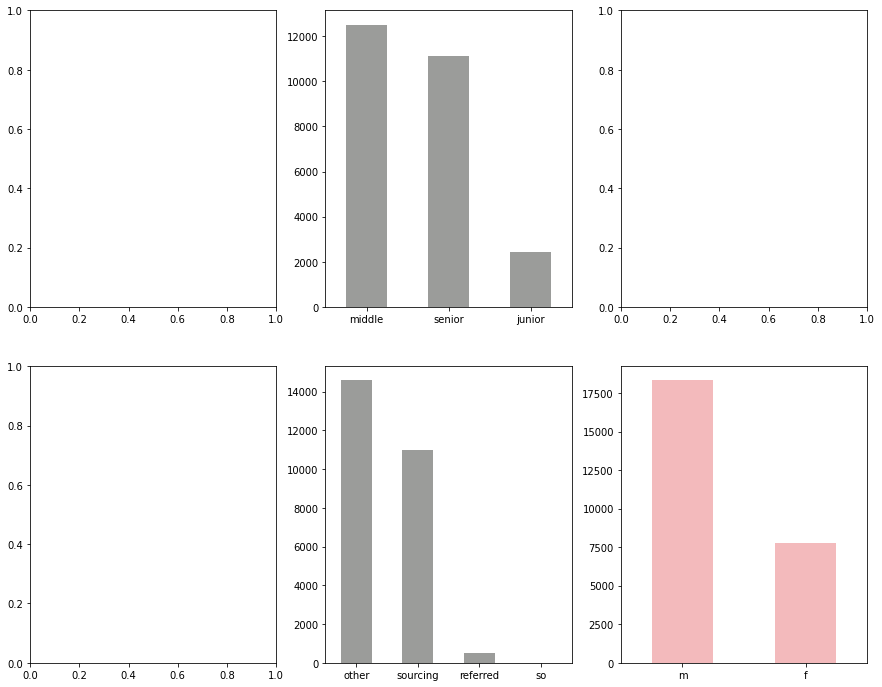

In [ ]:
atribut = ['department','education', 'gender', 'job_level', 'recruitment_channel' ]
fig, axes = plt.subplots(nrows = 2,ncols = 3,
figsize = (15,12))
for i, item in enumerate(atribut):
    if i < 3:
       ax = df[item].value_counts().plot(
       kind = 'bar',
       rot = 0, color ='#f3babc' )
        
    elif i >=3 and i < 6:
       ax = df[item].value_counts().plot(
       kind = 'bar',ax=axes[i-3,1],
       rot = 0,color ='#9b9c9a')
        
    elif i >=6:
       ax = df[item].value_counts().plot(
       kind = 'bar',ax=axes[i-6,1],rot = 0,
       color = '#ec838a')
       ax.set_title(item)

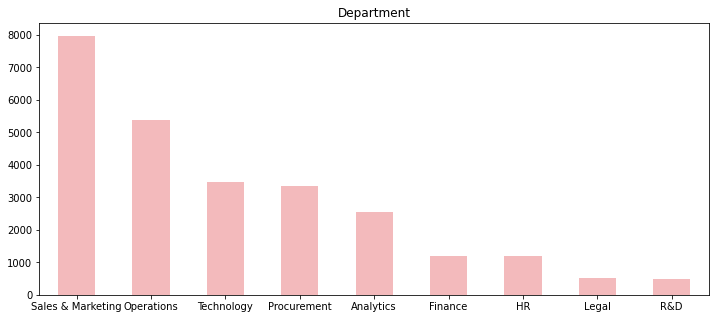

In [ ]:
df['department'].value_counts().plot(kind = 'bar',rot = 0, color ='#f3babc', figsize=(12,5) )
plt.title('Department')
plt.show()

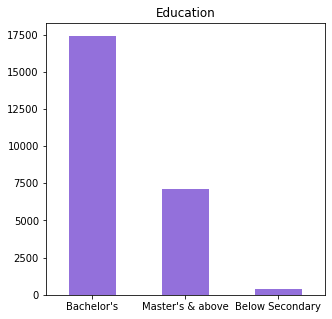

In [ ]:
df['education'].value_counts().plot(kind = 'bar',rot = 0, color ='#9370db', figsize=(5,5) )
plt.title('Education')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


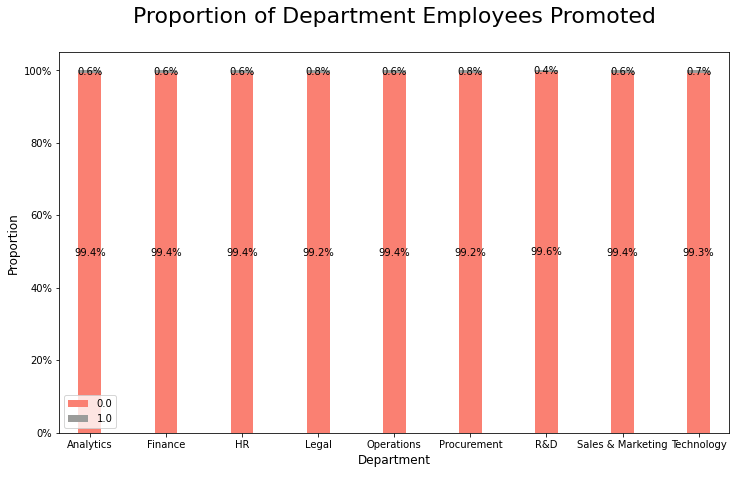

In [ ]:
import matplotlib.ticker as mtick
dep = df.groupby(['department','is_promoted']).size().unstack()
colors  = ['#fa8072','#9b9c9a']
ax = (dep.T*100.0 / dep.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)
plt.ylabel('Proportion',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Department\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Proportion of Department Employees Promoted\n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

In [ ]:
df['department'].value_counts()
dept_crosstab = pd.crosstab(df.department, df.is_promoted)
print(dept_crosstab)

is_promoted         0.0  1.0
department                  
Analytics          2541   15
Finance            1180    7
HR                 1173    7
Legal               523    4
Operations         5329   34
Procurement        3325   28
R&D                 483    2
Sales & Marketing  7914   51
Technology         3434   23


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  del sys.path[0]


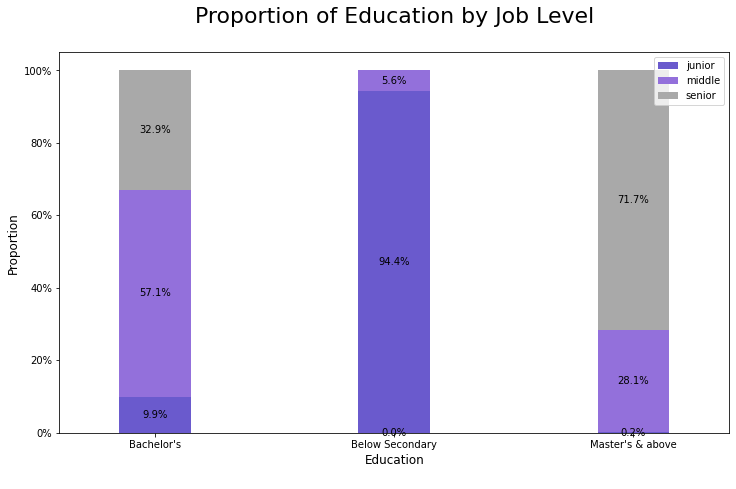

In [ ]:
ed = df.groupby(['education','job_level']).size().unstack()
colors  = ['#6a5acd','#9370db','#a9a9a9']
ax = (ed.T*100.0 / ed.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)
plt.ylabel('Proportion',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Education\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Proportion of Education by Job Level\n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

In [ ]:
del df['employee_id']

Text(0.5, 1.0, 'Correlation with Variable is_promoted \n')

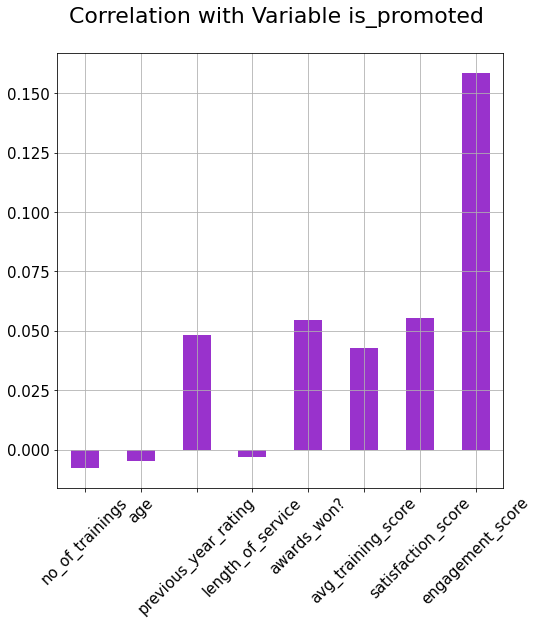

In [ ]:
correlations = df.corrwith(df.is_promoted)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (8, 8), 
        fontsize = 15, 
        color = '#9932cc',
        rot = 45, grid = True)
plt.title('Correlation with Variable is_promoted \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

**PREPOCESSING**

In [ ]:
# Missing Value
df.isnull().sum()

department                 0
region                     0
education               1180
gender                     0
job_level                  0
recruitment_channel        0
no_of_trainings            1
age                        1
previous_year_rating    1983
length_of_service          1
awards_won?                1
avg_training_score         1
satisfaction_score         1
engagement_score           1
is_promoted                1
dtype: int64

In [ ]:
# Fill NA in previous_year_rating with mean value
average_rating = df['previous_year_rating'].mean()
df['previous_year_rating'] = df['previous_year_rating'].fillna(average_rating)
df.dropna(inplace = True)

**1. NORMALITAS**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

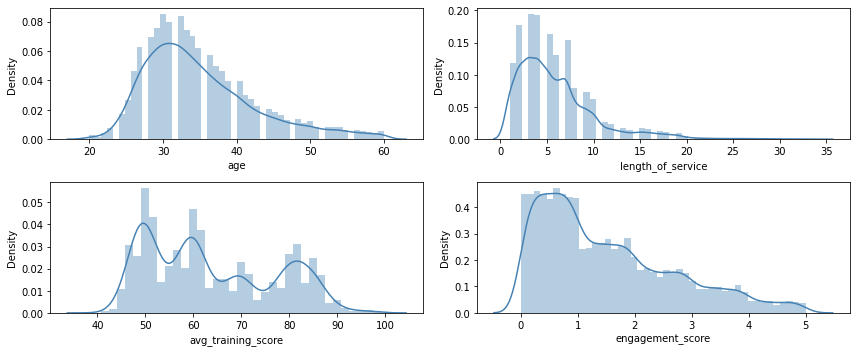

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,5))
for i in range(0, len(integer)):
    plt.subplot(2, len(integer)/2, i+1)
    sns.distplot(df[integer[i]], color='#4682b4')
    plt.tight_layout()

**2. Multicolinearity**

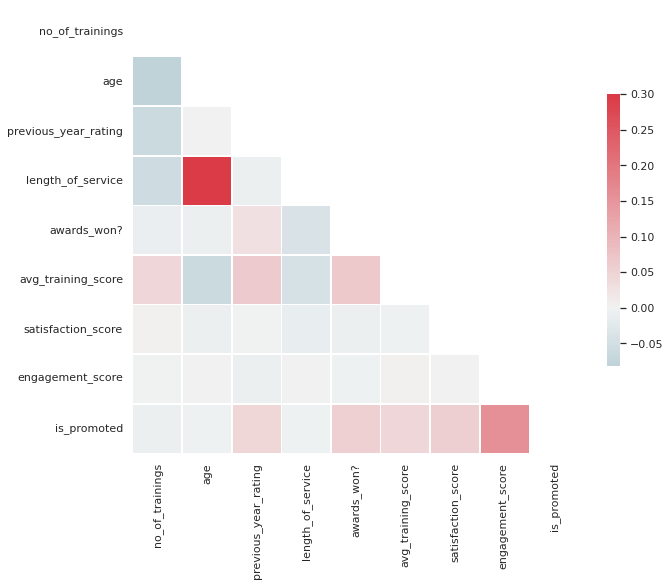

In [ ]:
#Set and compute the Correlation Matrix:
sn.set(style="white")
corr = df.corr()
#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(10, 10))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio:
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# Encoding Data
replace1 = ['f','m']
replacement1 = [0, 1]
df_en = df.copy()
df_en['gender'].replace(replace1, replacement1, inplace = True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder as enc

one_hot_encoded_data = pd.get_dummies(df_en, columns = ['job_level', 'recruitment_channel'])
df_enc = one_hot_encoded_data
df_enc.head(5)

,department,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,satisfaction_score,engagement_score,is_promoted,job_level_junior,job_level_middle,job_level_senior,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,Sales & Marketing,region_7,Master's & above,0,1.0,35.0,5.0,8.0,0.0,49.0,5.0,0.88,0.0,0,0,1,0,0,1
1,Operations,region_22,Bachelor's,1,1.0,30.0,5.0,4.0,0.0,60.0,1.0,0.31,0.0,0,1,0,1,0,0
2,Sales & Marketing,region_19,Bachelor's,1,1.0,34.0,3.0,7.0,0.0,50.0,5.0,3.10,0.0,0,1,0,0,0,1
3,Sales & Marketing,region_23,Bachelor's,1,2.0,39.0,1.0,10.0,0.0,50.0,4.0,0.64,0.0,0,0,1,1,0,0
4,Technology,region_26,Bachelor's,1,1.0,45.0,3.0,2.0,0.0,73.0,2.0,0.95,0.0,0,0,1,1,0,0


In [ ]:
del df_enc['department']
del df_enc['region']
del df_enc['education']
df_enc.head()

,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,satisfaction_score,engagement_score,is_promoted,job_level_junior,job_level_middle,job_level_senior,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,0,1.0,35.0,5.0,8.0,0.0,49.0,5.0,0.88,0.0,0,0,1,0,0,1
1,1,1.0,30.0,5.0,4.0,0.0,60.0,1.0,0.31,0.0,0,1,0,1,0,0
2,1,1.0,34.0,3.0,7.0,0.0,50.0,5.0,3.10,0.0,0,1,0,0,0,1
3,1,2.0,39.0,1.0,10.0,0.0,50.0,4.0,0.64,0.0,0,0,1,1,0,0
4,1,1.0,45.0,3.0,2.0,0.0,73.0,2.0,0.95,0.0,0,0,1,1,0,0


**3. Chi-Square**

In [ ]:
def getCaqVal(ft):
    df_cross = pd.crosstab(df_enc['is_promoted'], df_enc[ft])
    c_sq, p_val, df, data = stats.chi2_contingency(df_cross)
    return c_sq, p_val

chi = pd.DataFrame(columns=['variable', 'chisquare', 'pvalue'])
for n, a in enumerate([a for a in df_enc.columns if a != 'is_promoted']):
    chisq, pval = getCaqVal(a)
    pdData = [a, chisq, pval]
    chi.loc[n] = (a, chisq, pval)

chi['Kesimpulan'] = np.where(chi.pvalue < 0.05, 'Berpengaruh Signifikan', 'Tidak Berpengaruh Signifikan')
chi

,variable,chisquare,pvalue,Kesimpulan
0,gender,0.014486,9.041989e-01,Tidak Berpengaruh Signifikan
1,no_of_trainings,2.400412,9.834428e-01,Tidak Berpengaruh Signifikan
2,age,45.202506,2.636782e-01,Tidak Berpengaruh Signifikan
3,previous_year_rating,64.091551,1.729346e-12,Berpengaruh Signifikan
4,length_of_service,188.111239,1.263599e-23,Berpengaruh Signifikan
5,awards_won?,67.834822,1.777819e-16,Berpengaruh Signifikan
6,avg_training_score,330.471825,5.018704e-39,Berpengaruh Signifikan
7,satisfaction_score,112.051734,2.656728e-23,Berpengaruh Signifikan
8,engagement_score,2507.503792,8.740947e-264,Berpengaruh Signifikan
9,job_level_junior,5.495351,1.906710e-02,Berpengaruh Signifikan


**4. FIX ASSUMTION**

In [ ]:
fs = ['previous_year_rating', 'length_of_service','awards_won?', 'avg_training_score','satisfaction_score', 'engagement_score', 'is_promoted']

In [ ]:
df_fs = df_enc[fs]

In [ ]:
# Dealing with data that are not normally distributed
int_fs = ['length_of_service', 'avg_training_score','engagement_score']
df_fsn = df_fs.copy()
df_fs_log = df_fs.copy()
df_fs_recipro = df_fs.copy()
df_fs_sqrt = df_fs.copy()

for var in int_fs:
    print('Original Skewness', var, ':', df_fsn[var].skew(skipna = True))
    df_fs_log[var] = df_fs[var].map(lambda x: np.log(x))
    print('Log Transformation Skewness Result =', var, ':', df_fs_log[var].skew(skipna = True))
    df_fs_recipro[var] = df_fs[var].map(lambda x: np.reciprocal(x))
    print('Reciprocal Transformation Skewness Result =', var, ':', df_fs_recipro[var].skew(skipna = True))
    df_fs_sqrt[var] = df_fs[var].map(lambda x: np.sqrt(x))
    print('Square Root Transformation Skewness Result =', var, ':', df_fs_sqrt[var].skew(skipna = True))
    print('---------------------------------------------------------------------------------------------------')

Original Skewness length_of_service : 1.7389935185983445
Log Transformation Skewness Result = length_of_service : -0.2951621783163894
Reciprocal Transformation Skewness Result = length_of_service : 1.886778195421121
Square Root Transformation Skewness Result = length_of_service : 0.6647568340758389
---------------------------------------------------------------------------------------------------
Original Skewness avg_training_score : 0.42568823563488717
Log Transformation Skewness Result = avg_training_score : 0.19372475336653033
Reciprocal Transformation Skewness Result = avg_training_score : 0.04356060067900029
Square Root Transformation Skewness Result = avg_training_score : 0.31038394360165966
---------------------------------------------------------------------------------------------------
Original Skewness engagement_score : 0.8802018730636343
Log Transformation Skewness Result = engagement_score : nan
Reciprocal Transformation Skewness Result = engagement_score : nan
Square Ro

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in reciprocal
  if sys.path[0] == '':


In [ ]:
df_fs['length_of_service_trans'] = df_fs['length_of_service'].map(lambda x: np.log(x))
df_fs.drop(['length_of_service'], axis = 1, inplace = True)

df_fs['avg_training_score_trans'] = df_fs['avg_training_score'].map(lambda x: np.log(x))
df_fs.drop(['avg_training_score'], axis = 1, inplace = True)

df_fs['engagement_score_trans'] = df_fs['engagement_score'].map(lambda x: np.sqrt(x))
df_fs.drop(['engagement_score'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [ ]:
df_fs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24893 entries, 0 to 26072
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   previous_year_rating      24893 non-null  float64
 1   awards_won?               24893 non-null  float64
 2   satisfaction_score        24893 non-null  float64
 3   is_promoted               24893 non-null  float64
 4   length_of_service_trans   24893 non-null  float64
 5   avg_training_score_trans  24893 non-null  float64
 6   engagement_score_trans    24893 non-null  float64
dtypes: float64(7)
memory usage: 1.5 MB


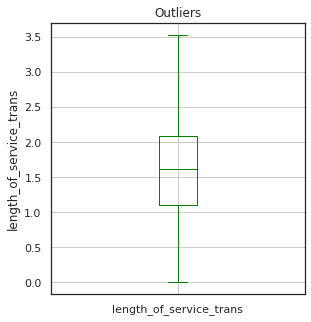

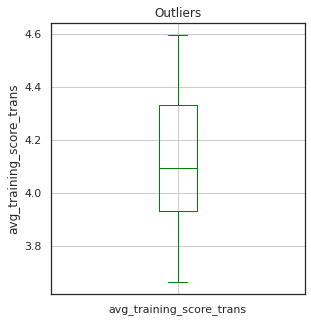

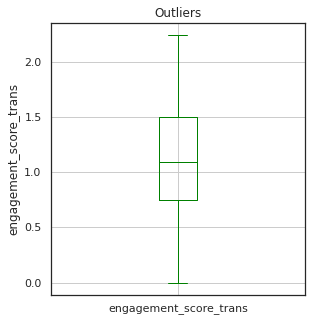

In [ ]:
integer2 = ['length_of_service_trans', 'avg_training_score_trans','engagement_score_trans']
for var in integer2:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    fig = df_fs.boxplot(column=var, color = 'green')
    fig.set_title('Outliers')
    fig.set_ylabel(var)
    plt.show()

In [ ]:
df_fs['is_promoted'].value_counts()

0.0    24729
1.0      164
Name: is_promoted, dtype: int64

**5. SPLIT TRAIN TEST**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
seed = 42

X_train, X_test, y_train, y_test = train_test_split(
      df_fs.drop('is_promoted', axis=1),
      df_fs['is_promoted'],
      test_size = 0.2,
      stratify = df_fs['is_promoted'],
      shuffle = True,
      random_state = seed
)

In [ ]:
# Normalize the variable
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train2 = pd.DataFrame(sc_x.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_x.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [ ]:
y_train.value_counts()

0.0    19783
1.0      131
Name: is_promoted, dtype: int64

In [ ]:
#SMOTE for oversampling
from imblearn.over_sampling import SMOTE

smo = SMOTE(random_state=42)
X_train_res, y_train_res = smo.fit_resample(X_train, y_train)
X_test_res, y_test_res = smo.fit_resample(X_test, y_test)

In [ ]:
#Logistic Regression
logreg = LogisticRegression(max_iter=100000, random_state=seed)
logreg.fit(X_train_res, y_train_res)
y_preds = logreg.predict(X_test_res)
test_recall = recall_score(y_test_res, y_preds, average = 'binary')
test_recall

0.9652244237767893

In [ ]:
logit_model = sm.Logit(y_train_res, X_train_res)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.469216
         Iterations 6


In [ ]:
yhat = result.predict(X_test_res)
prediction = list(map(round, yhat))

In [ ]:
cm = confusion_matrix(y_test_res, prediction)
df_confMat = pd.DataFrame(cm, columns=['predicted_not_promoted','predicted_promoted'], index=['not_promoted', 'promoted'])

print('Precision = {}'.format(cm[1][1]/(cm[1][1]+cm[0][1])))
print('Recall = {}'.format(cm[1][1]/(cm[1][1]+cm[1][0])))
print('Accuracy = {}'.format(cm[1][1]/(sum(sum(cm)))))
df_confMat

Precision = 0.676144907723855
Recall = 1.0
Accuracy = 0.5


,predicted_not_promoted,predicted_promoted
not_promoted,2577,2369
promoted,0,4946


In [ ]:
#Decission Tree
clf = DecisionTreeClassifier()
clf_res = clf.fit(X_train_res, y_train_res)
yhat_dt = clf_res.predict(X_test_res)
prediction_dt = list(map(round, yhat_dt))

cm_dt = confusion_matrix(y_test_res, prediction_dt)
df_confMat_dt = pd.DataFrame(cm_dt, columns=['predicted_not_promoted','predicted_promoted'], index=['not_promoted', 'promoted'])

print('Precision = {}'.format(cm_dt[1][1]/(cm_dt[1][1]+cm_dt[0][1])))
print('Recall = {}'.format(cm_dt[1][1]/(cm_dt[1][1]+cm_dt[1][0])))
print('Accuracy = {}'.format(cm_dt[1][1]/(sum(sum(cm_dt)))))
df_confMat_dt

Precision = 0.9825829773250082
Recall = 0.6045289122523251
Accuracy = 0.30226445612616254


,predicted_not_promoted,predicted_promoted
not_promoted,4893,53
promoted,1956,2990


In [ ]:
#Random Forest
clf_rf = RandomForestClassifier()
clf_res_rf = clf_rf.fit(X_train_res, y_train_res)

yhat_rf = clf_res_rf.predict(X_test_res)
prediction_rf = list(map(round, yhat_rf))

cm_rf = confusion_matrix(y_test_res, prediction_rf)
df_confMat_rf = pd.DataFrame(cm_rf, columns=['predicted_not_promoted','predicted_promoted'], index=['not_promoted', 'promoted'])

print('Precision = {}'.format(cm_rf[1][1]/(cm_rf[1][1]+cm_rf[0][1])))
print('Recall = {}'.format(cm_rf[1][1]/(cm_rf[1][1]+cm_rf[1][0])))
print('Accuracy = {}'.format(cm_rf[1][1]/(sum(sum(cm_rf)))))
df_confMat_rf

Precision = 0.9906380881990638
Recall = 0.8129801860088961
Accuracy = 0.40649009300444805


,predicted_not_promoted,predicted_promoted
not_promoted,4908,38
promoted,925,4021


In [ ]:
#Important features from Random Forest Classifier Method
fi_rf = clf_res_rf.feature_importances_
rfi_rf = np.abs(fi_rf)/np.sum(np.abs(fi_rf))
col = X_train_res.columns
df_fi_rf = pd.DataFrame({'feature' : col, 'coef' : rfi_rf}).set_index('feature')
df_fi_rf = df_fi_rf.sort_values(by='coef', ascending=True)
df_fi_rf

,coef
feature,
awards_won?,0.003688
length_of_service_trans,0.036168
avg_training_score_trans,0.058061
previous_year_rating,0.071402
satisfaction_score,0.153677
engagement_score_trans,0.677005


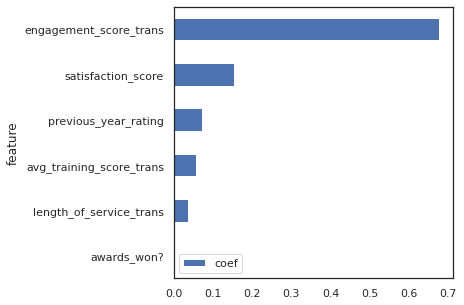

In [ ]:
df_fi_rf.plot.barh(y='coef')